# Data Information

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

# Attribute Information

Input variables (based on physicochemical tests):
* 1 - fixed acidity
* 2 - volatile acidity
* 3 - citric acid
* 4 - residual sugar
* 5 - chlorides
* 6 - free sulfur dioxide
* 7 - total sulfur dioxide
* 8 - density
* 9 - pH
* 10 - sulphates
* 11 - alcohol
Output variable (based on sensory data):
* 12 - quality (score between 0 and 10)

# Importin Required Package

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [178]:
df = pd.read_csv('Red wine quality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Proprocessing the dataset

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistant, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data preprocessing is a proven method of resolving such issues. We can also find usefull relation with its help. In this project a dataset of different attributes of red wine will be analysed and their to quality of the wine will be shown statistically for improvement of production or manufacturing purposes.

In [179]:
print('Shape of out dataset of Red wine: {S}'.format(S=df.shape))
print('Column headers/name: {S}'.format(S=list(df)))

Shape of out dataset of Red wine: (1599, 12)
Column headers/name: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


df.info() function provides the detailed structure of the table and datatypes and attributes

In [180]:
# Now let's check the information about different variables/columns from the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The describe() function takes into account the measures of central tendencies to give an in depth numeric idea of the attributes of the dataset.

In [181]:
# Let's look at the summary of the dataset.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Using the isnull().sum() function we can extract the count of the total number of null entries in each attributes.

In [182]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

After extracting the above function we get to know that none of the attributes comprise of any null entries.

The unique() function is providing all the unique values in quality attribute of the dataset.

In [183]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

The value_counts().sort_index() will provide number of data with respect to each value of attribute is a sorted manner.

In [184]:
df.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

The countplot function gives a countplot graph of desired attributes.

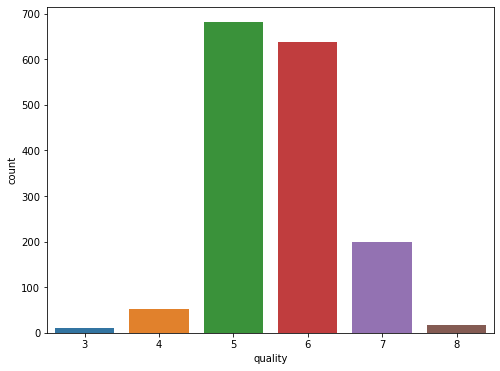

In [185]:
plt.figure(figsize=(8,6))
sns.countplot(x='quality',data=df)
plt.show()

# PLOTTING GRAPH FOR BETTER INSIGHT TO DATA DISTRIBUTION

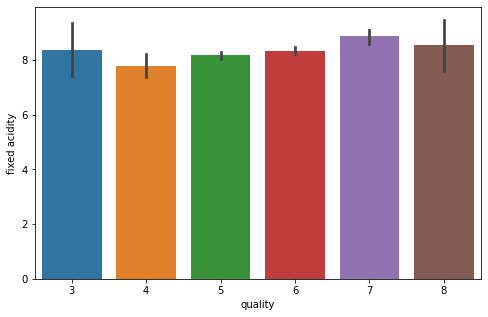

In [140]:
#fixed acidity v/s quality
plt.figure(figsize=(8,5))
sns.barplot(x='quality', y='fixed acidity', data=df)

### There is no fixed trend in this plot. Hence, this is not much use to us.

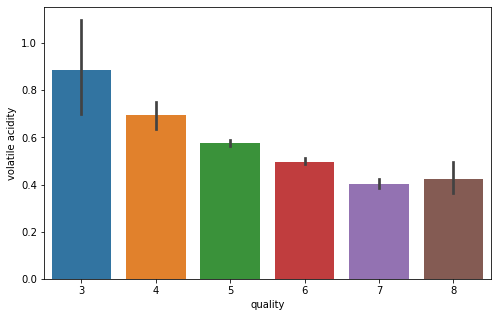

In [141]:
#fixed acidity v/s quality
plt.figure(figsize=(8,5))
sns.barplot(x='quality', y='volatile acidity', data=df)

### There is a downtrend in the above plot

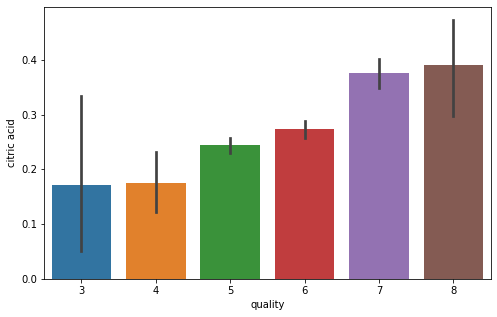

In [142]:
#fixed acidity v/s quality
plt.figure(figsize=(8,5))
sns.barplot(x='quality', y='citric acid', data=df)

### There is a Increasing trend in the above plot

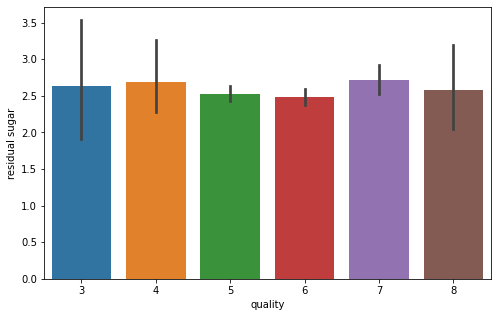

In [143]:
#fixed acidity v/s quality
plt.figure(figsize=(8,5))
sns.barplot(x='quality', y='residual sugar', data=df)

### There is no fixed trend in this plot. this is not much used to us

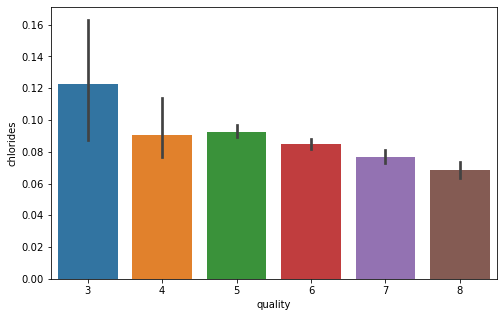

In [144]:
#fixed acidity v/s quality
plt.figure(figsize=(8,5))
sns.barplot(x='quality', y='chlorides', data=df)

### There is a downtrend in this plot

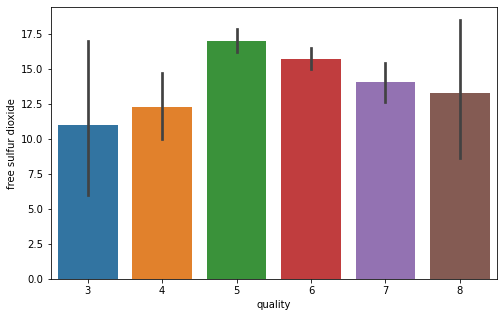

In [145]:
#fixed acidity v/s quality
plt.figure(figsize=(8,5))
sns.barplot(x='quality', y='free sulfur dioxide', data=df)

### There is no fixed trend in this plot. this is not much used to us

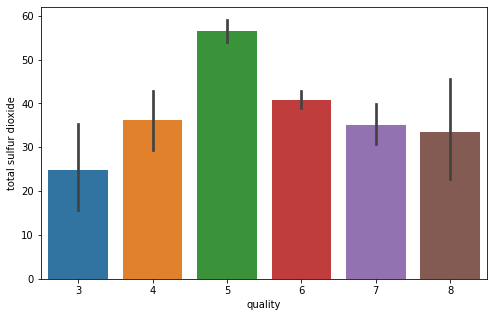

In [146]:
#fixed acidity v/s quality
plt.figure(figsize=(8,5))
sns.barplot(x='quality', y='total sulfur dioxide', data=df)

### There is no fixed trend in this plot. this is not much used to us

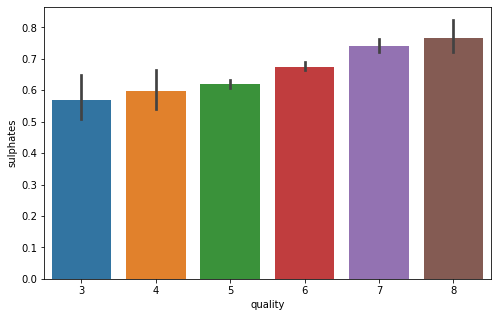

In [147]:
#fixed acidity v/s quality
plt.figure(figsize=(8,5))
sns.barplot(x='quality', y='sulphates', data=df)

### There is a 'Increasing Trend' in the above plot

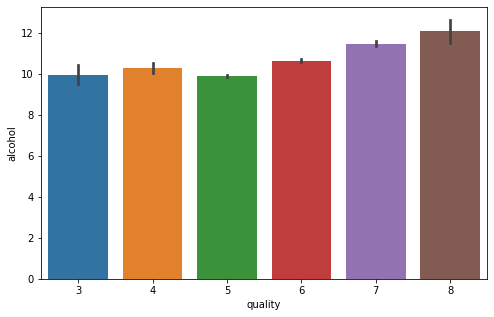

In [148]:
#fixed acidity v/s quality
plt.figure(figsize=(8,5))
sns.barplot(x='quality', y='alcohol', data=df)

### There is an Increasing Trend in the above plot

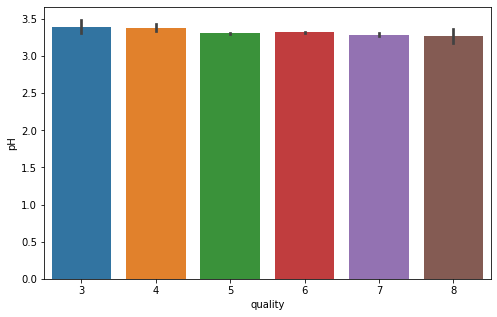

In [149]:
#fixed acidity v/s quality
plt.figure(figsize=(8,5))
sns.barplot(x='quality', y='pH', data=df)

### There is a Downtrend in the above plot

In [186]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Classifyin the wine quality as good or bad based on its quality

In [187]:
# 'Bad' or 0 if quality of wine lies in the range (3,6) {inclusive}
# 'Good' or 1 if quality of wine lies in the range (7,8) {inclusive}

df['quality'] = df['quality'].apply(lambda x: 1 if x>6.5 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [190]:
df.shape

(1599, 12)

### So 0 indicates BAD and 1 indicates GOOD

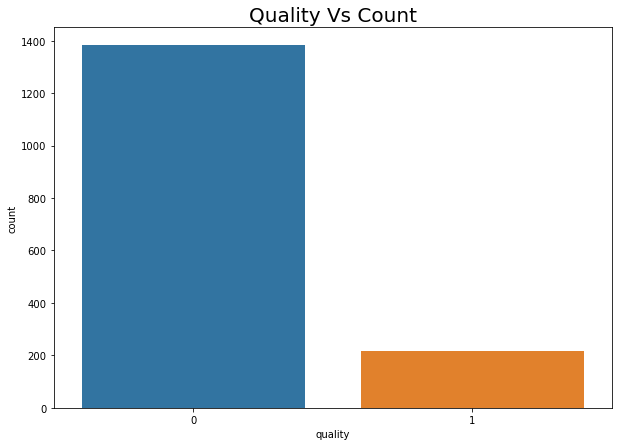

In [189]:
plt.figure(figsize=(10,7))
plt.title('Quality Vs Count',fontsize=20)
sns.countplot(df['quality'])

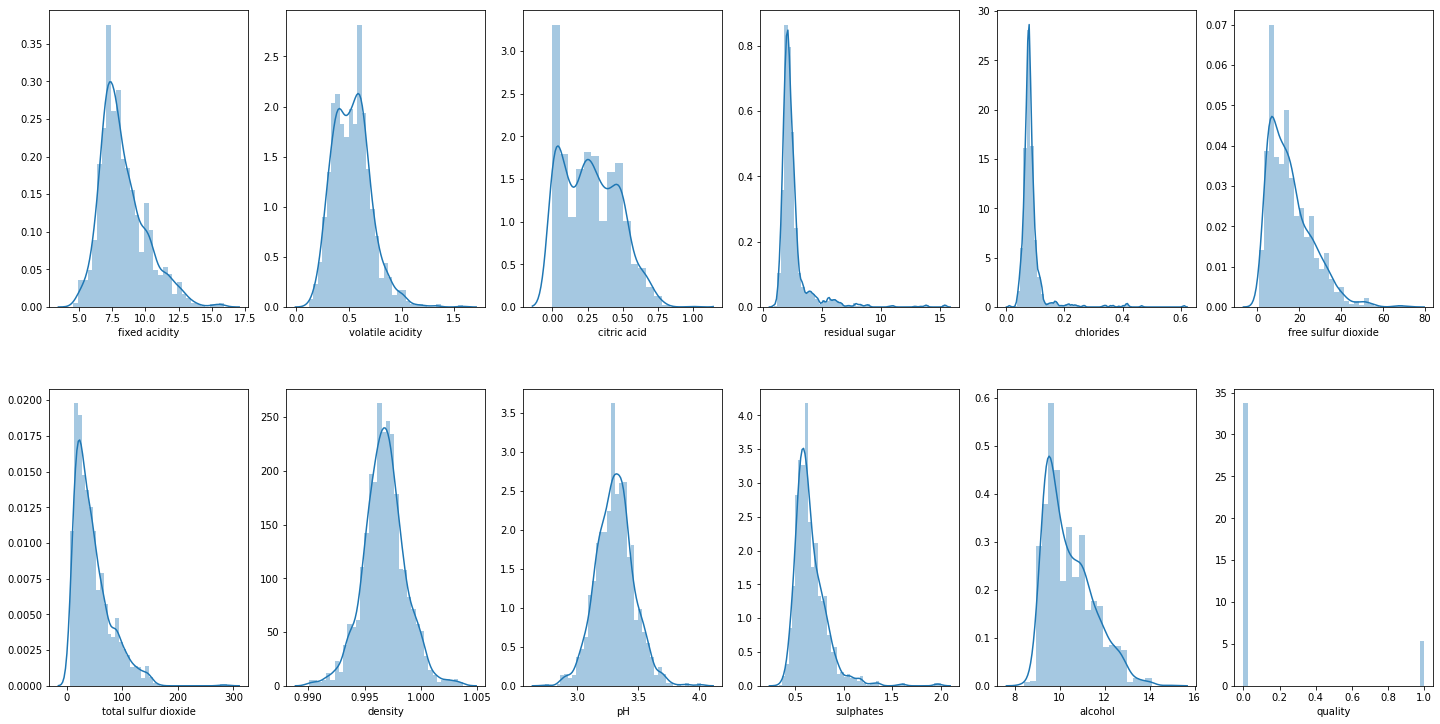

In [158]:
# create distplot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'types':
        sns.distplot(value,ax=ax[index])
        index+= 1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

### As we can see there are no skewness problem with the dataset. Hence, we moving ahead to check for the correlation

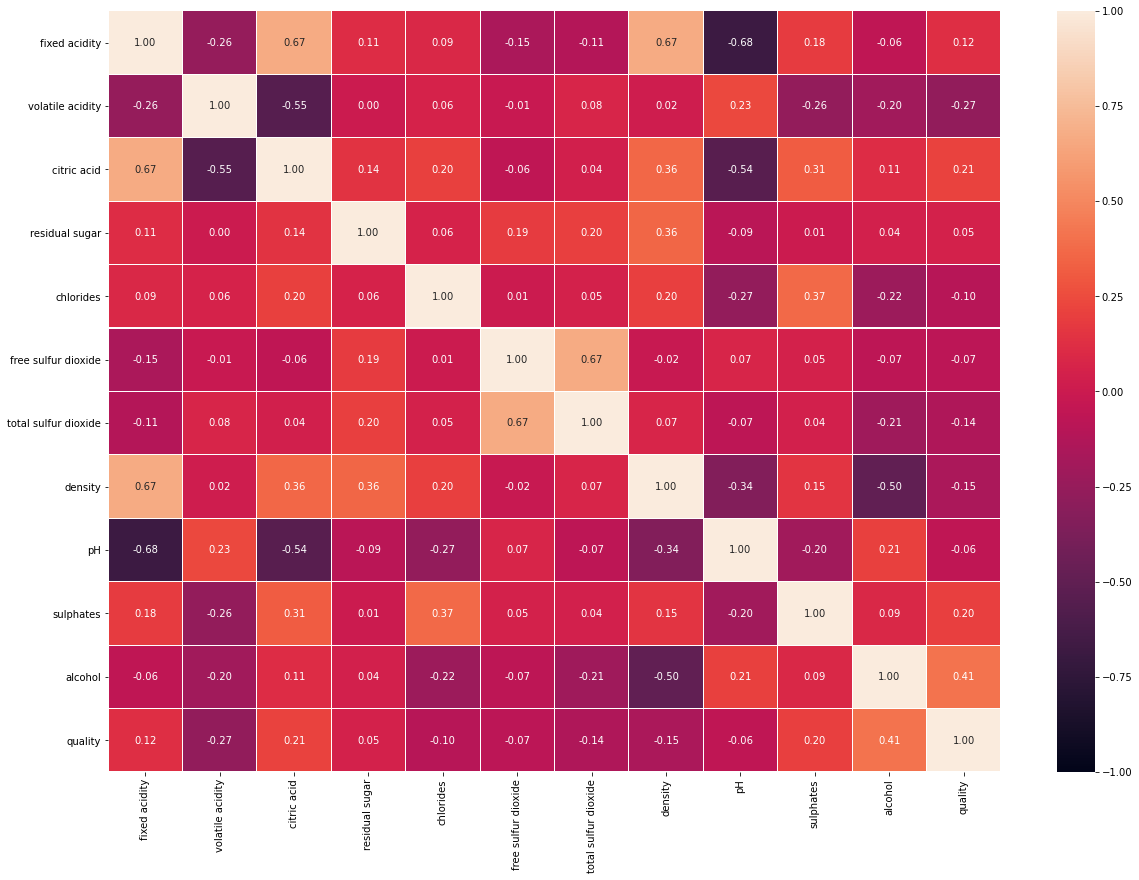

In [159]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='white',fmt='0.2f',vmin=-1)

In [160]:
corr = df.corr()
corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: quality, dtype: float64

In the above fragment of code and output, conclusion can be made that the attributes alcohol, sulphates, Citric acid, fixed acidity have maximum correlation with 'quality' attribute.
Hence, these four will be used further for pattern and correlation exploration 

### Alcohol Percent vs Wine Quality

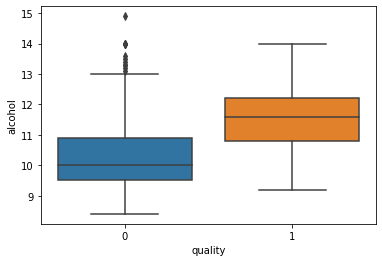

In [161]:
sns.boxplot(x='quality',y='alcohol',data=df)

### Citric Acid vs Wine Quality

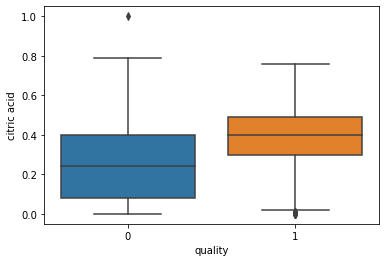

In [162]:
sns.boxplot(x='quality',y='citric acid',data=df)

### Sulphates vs Wine Quality

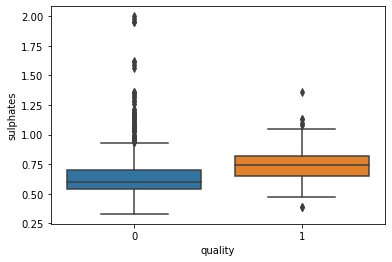

In [247]:
sns.boxplot(x='quality',y='sulphates',data=df)

### Fixed acidity vs Wine Quality

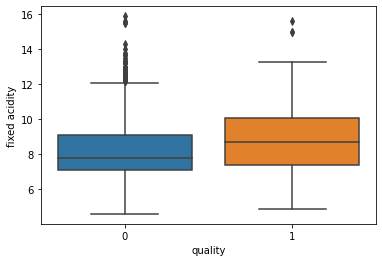

In [248]:
sns.boxplot(x='quality',y='fixed acidity',data=df)

### Residual sugar vs Wine Quality

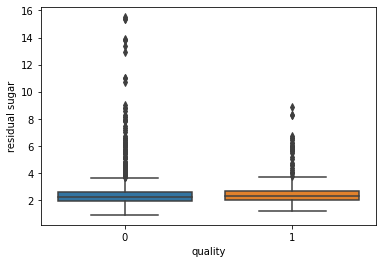

In [249]:
sns.boxplot(x='quality',y='residual sugar',data=df)

### One thing we can definitely notice from the above plots is that the variation is decreasing when correlation decreased

### Seperating the Dependent and Independent Variables

In [191]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

### Finding the best random state

In [193]:
maxAccu=0
maxRS=0
for i in range(100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predLR = LR.predict(x_test)
    acc = accuracy_score(y_test,predLR)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('The best accuracy score is ',maxAccu,'On Random State',maxRS)

The best accuracy score is  0.91875 On Random State 73


In [169]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=73)

### applying Standard Scaling to the datase to scale all the fields values to same scale (approx)

In [194]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Building the Model

### Random Forest Classifier

In [197]:
RF = RandomForestClassifier(n_estimators = 100)
RF.fit(x_train,y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test,predRF))
print(confusion_matrix(y_test,predRF))
print(classification_report(y_test,predRF))

0.896875
[[272  12]
 [ 21  15]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       284
           1       0.56      0.42      0.48        36

    accuracy                           0.90       320
   macro avg       0.74      0.69      0.71       320
weighted avg       0.89      0.90      0.89       320



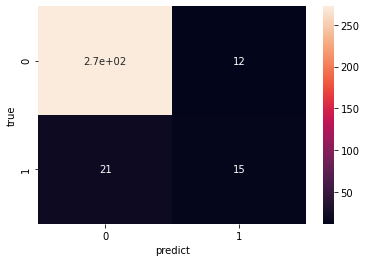

In [199]:
cml=confusion_matrix(y_test,predRF)
axl = sns.heatmap(cml,annot=True)
axl.set(xlabel='predict',ylabel='true')
plt.show()

### Logistic Regression

In [201]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8625
[[262  22]
 [ 22  14]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       284
           1       0.39      0.39      0.39        36

    accuracy                           0.86       320
   macro avg       0.66      0.66      0.66       320
weighted avg       0.86      0.86      0.86       320



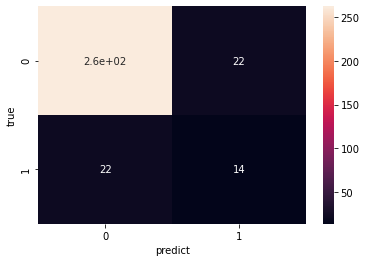

In [202]:
cml=confusion_matrix(y_test,predLR)
axl = sns.heatmap(cml,annot=True)
axl.set(xlabel='predict',ylabel='true')
plt.show()

### Decision Tree Classifier

In [204]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
predDT = DT.predict(x_test)
print(accuracy_score(y_test,predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))

0.840625
[[249  35]
 [ 16  20]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       284
           1       0.36      0.56      0.44        36

    accuracy                           0.84       320
   macro avg       0.65      0.72      0.67       320
weighted avg       0.87      0.84      0.85       320



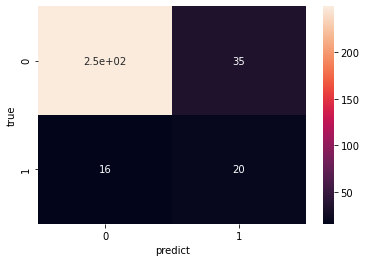

In [205]:
cml=confusion_matrix(y_test,predDT)
axl = sns.heatmap(cml,annot=True)
axl.set(xlabel='predict',ylabel='true')
plt.show()

### Support Vector Machine

In [208]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.890625
[[274  10]
 [ 25  11]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       284
           1       0.52      0.31      0.39        36

    accuracy                           0.89       320
   macro avg       0.72      0.64      0.66       320
weighted avg       0.87      0.89      0.88       320



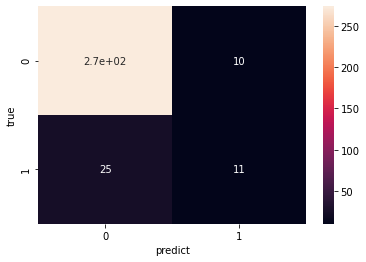

In [209]:
cml=confusion_matrix(y_test,predsvc)
axl = sns.heatmap(cml,annot=True)
axl.set(xlabel='predict',ylabel='true')
plt.show()

In [210]:
SCR=cross_val_score(RF,x,y,cv=5)
print('Cross Validation score of RandomForestClassifier Model is :',SCR.mean())

Cross Validation score of RandomForestClassifier Model is : 0.8749314263322884


In [211]:
SCR=cross_val_score(LR,x,y,cv=5)
print('Cross Validation score of LogisticRegression Model is :',SCR.mean())

Cross Validation score of LogisticRegression Model is : 0.8705446708463949


In [212]:
SCR=cross_val_score(DT,x,y,cv=5)
print('Cross Validation score of DecisionTreeClassifier Model is :',SCR.mean())

Cross Validation score of DecisionTreeClassifier Model is : 0.8061167711598746


In [213]:
SCR=cross_val_score(svc,x,y,cv=5)
print('Cross Validation score of Support Vector Machin Model is :',SCR.mean())

Cross Validation score of Support Vector Machin Model is : 0.8642907523510971


### Here Random Classifier has given a better score. So, we will the same to predict the quality of wine.

# Hyper Parameter Tuning

In [214]:
parameter = {'max_depth':np.arange(2,15),'criterion':['gini','entropy']}

In [215]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [216]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [217]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 12}

In [218]:
mod=RandomForestClassifier(criterion='entropy',max_depth=12,random_state=73)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

89.0625


### As we can see with the Hyper Parameter Tuning we are able to increase the accuracy score for RandomForestClassifier from 87 to 89 percent.

# Saving the model

In [219]:
import pickle
filename = 'RedWine.pkl'
pickle.dump(RF, open(filename,'wb'))

# Conclusion

In [221]:
loaded_mod = pickle.load(open('RedWine.pkl','rb'))
result = loaded_mod.score(x_test,y_test)
print(result)

0.896875


In [223]:
conclusion=pd.DataFrame([loaded_mod.predict(x_test)[:],predRF[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
Predicted,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
Original,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


### Plotting ROC & Precision - Recall Curves using sklearn function

In [224]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve

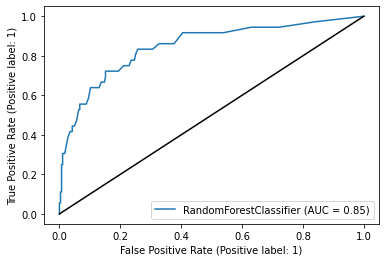

In [228]:
plot_roc_curve(RF,x_test,y_test)
plt.plot([0,1],[0,1],c='k')

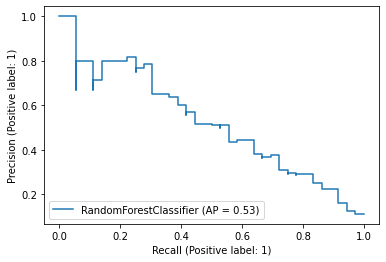

In [229]:
plot_precision_recall_curve(RF,x_test,y_test)
#plt.plot([0,1],[0,1],c='k')